In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
from PIL import ImageFilter, Image 
import math
import PySpin
import cv2

In [16]:
%%time
def gauss(x, A, mu, sigma, off):
    return A * np.exp(-(x-mu)**2 / (2 * sigma**2)) + off

CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
%%time
ppmm = 1/0.0069  # pixels per mm to convert position to mm
#ppmm = 1


144.92753623188406
CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
#I = io.imread('D:/STUDY/Thesis & Internship/pybeamprofiler/data/img-05102023194812-19819.png')
# in the original cod this should be a capture from the vid that will be shown to the user
#imsz = I.shape
#x_rows = np.arange(imsz[1])
#x_col = np.arange(imsz[0])

In [19]:
%%time
II=Image.open('D:/STUDY/Thesis & Internship/pybeamprofiler/data/cam1-05312023161329-46.png')
II=II.resize([54,72])
II=II.resize([540,720])

CPU times: total: 0 ns
Wall time: 5.51 ms


In [20]:
%%time
I=np.asarray(II)
imsz = I.shape
x_rows = np.arange(imsz[1])
x_col = np.arange(imsz[0])
I=I/np.amax(I)
yx_coords = np.column_stack(np.where((I >= 0.6 )&(I<=0.606)))




CPU times: total: 0 ns
Wall time: 4.04 ms


In [21]:
%%time
Y_max=((np.amax(yx_coords[:,0])+np.amin(yx_coords[:,0]))/2)

X_max=((np.amax(yx_coords[:,1])+np.amin(yx_coords[:,1]))/2)


CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
%%time
KK=(yx_coords[:,1]-X_max)**2+(yx_coords[:,0]-Y_max)**2
P_axis=np.where(KK==np.amax(KK))
P_axis=yx_coords[P_axis[0]]
m=(P_axis[0][0]-Y_max)/(P_axis[0][1]-X_max)
X=np.linspace(200, 300, num=200)
Y=(m)*(X-X_max)+Y_max
print(math.atan(m)*180/math.pi)

-81.0760115563686
CPU times: total: 0 ns
Wall time: 1.99 ms


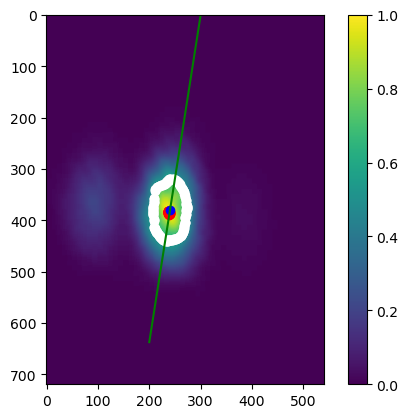

CPU times: total: 250 ms
Wall time: 402 ms


In [23]:
%%time

plt.figure()
plt.imshow(I)
plt.colorbar()
plt.scatter(yx_coords[:,1],yx_coords[:,0], c='w')
plt.scatter(MAX_POS[:,1],MAX_POS[:,0], c='r')
plt.scatter(X_max,Y_max, c='b')
plt.plot(X,Y, c='g')
plt.show()

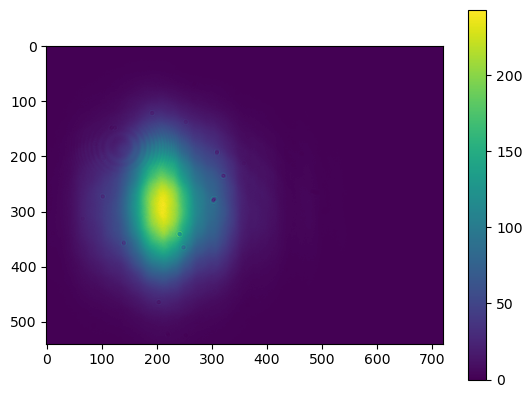

In [20]:
#III=II.crop(((round(X_max)-140),(round(Y_max)-350),(round(X_max)+140),(round(Y_max)+350)))

plt.figure()
plt.imshow(image_data)
plt.colorbar()
plt.show()

TypeError: Image data of dtype object cannot be converted to float

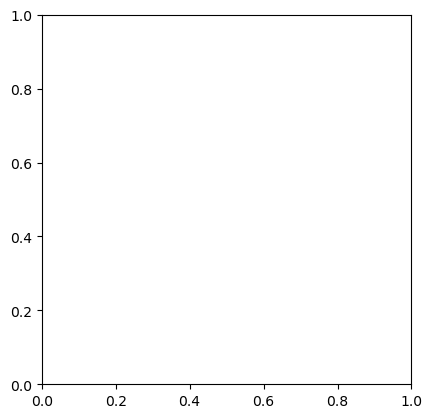

In [12]:
#IIII=III.rotate((math.atan(m)*180/math.pi)-90)
plt.figure()
plt.imshow(image_converted)
plt.colorbar()
plt.show()

In [29]:

sum_rows = np.mean(IIII, axis=0)   #get array with the sums of the rows
sum_col = np.mean(IIII, axis=1) #get array with the sums of the columns

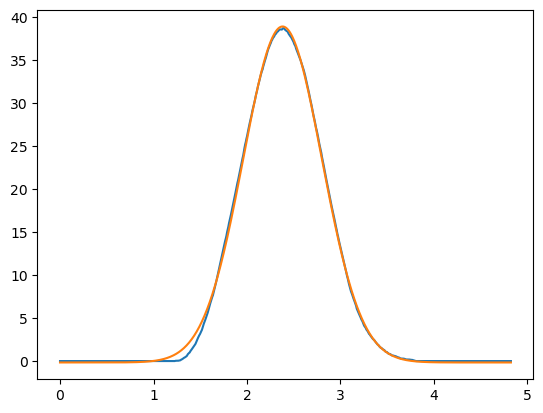

In [30]:
x_col=np.linspace(0, 699, num=700)/ppmm
mu0 = np.argmax(sum_col)
ampl0 = np.max(sum_col)
p0 = ampl0, mu0

popt2,pcov2 = curve_fit(gauss, x_col,  sum_col)

pos = popt2[1]
std = popt2[2]
plt.figure()
plt.plot(x_col,sum_col)
plt.plot(x_col,gauss(x_col, *popt2))

In [31]:
len(sum_col)

700

In [7]:
# import the opencv library
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if cv2.waitKey(1) & 0xFF == ord('r'):
        G=frame
        vid.set(cv2.CAP_PROP_EXPOSURE, -1) 
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [3]:
import PySpin
import cv2

serial = '20270795' #Probably different for you although I also use a BlackFly USB3.0

system = PySpin.System.GetInstance()

blackFly_list = system.GetCameras()

blackFly = blackFly_list.GetBySerial(serial)

height = blackFly.Height()
width = blackFly.Width()
channels = 1

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('test_vid.avi',fourcc, blackFly.AcquisitionFrameRate(), (blackFly.Width(), blackFly.Height()), False) #The last argument should be True if you are recording in color.


blackFly.Init()
blackFly.AcquisitionMode.SetValue(PySpin.AcquisitionMode_Continuous)
blackFly.BeginAcquisition()

nFrames = 1000

for _ in range(nFrames):
    im = blackFly.GetNextImage()    

    im_cv2_format = im.GetData().reshape(height,width,channels)

    # Here I am writing the image to a Video, but once you could save the image as something and just do whatever you want with it.
    out.write(im_cv2_format)
    im.release()

out.release()  

SpinnakerException: Spinnaker: Invalid handle of type IntegerNode. [-1006]

<IPython.core.display.Javascript object>


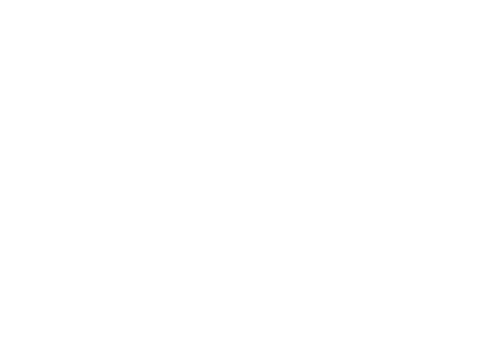

In [41]:
def handle_close(evt):
    """
    This function will close the GUI when close event happens.

    :param evt: Event that occurs when the figure closes.
    :type evt: Event
    """

    global continue_recording
    continue_recording = False
%matplotlib notebook


serial = '20270795'
system = PySpin.System.GetInstance()
version = system.GetLibraryVersion()
cam_list = system.GetCameras()
cam=cam_list.GetBySerial(serial)
cam.Init()
processor = PySpin.ImageProcessor()
cam.BeginAcquisition()

fig = plt.figure()
#fig.canvas.mpl_connect('close_event', handle_close)

for i in range (100):
    image_result = cam.GetNextImage(1000)
    image_data = image_result.GetNDArray()
    if ax is None:
        ax = plt.imshow(image_data, cmap='gray')
    else:
         ax.imshow(image_data, cmap='gray')
    plt.pause(0.1)
    plt.clf()
   
    image_result.Release()  

#mage_converted = processor.Convert(image_result, PySpin.PixelFormat_Mono8)

cam.EndAcquisition()
cam.DeInit()

In [39]:
%%time
%matplotlib qt
fig = plt.figure(1)
ax = None
#fig.canvas.mpl_connect('close_event', handle_close)
m=1
for i in range (100):
    A=np.random.randint(0, 255, size=[720,540])
    plt.imshow(A, cmap='gray')

    plt.pause(0.001)    
    plt.clf()
    #plt.clf()
    #plt.show()

CPU times: total: 9.78 s
Wall time: 9.78 s


In [39]:

cam.EndAcquisition()
cam.DeInit()


In [18]:
import scipy
import PIL
type(image_data)

numpy.ndarray

In [ ]:
Num_of_frames=6
X_Max_Pos=np.zeros(Num_of_frames)   #array to follow the X-position of the beam center
Y_Max_Pos=np.zeros(Num_of_frames)   #array to follow the Y-position of the beam center
for x in range(Num_of_frames):
    X_Max_Pos[x]=X_max
    Y_Max_Pos[x]=Y_max

In [ ]:
FrameNP =  image_result.GetNDArray() #get the result as a numpy array
FramePIL = PIL.Image.fromarray( FrameNP ) #get the result as a PIL image
image_result.Release() #releases the result to increase speed

FrameNP = (FrameNP - np.min(FrameNP)) / (np.max(FrameNP) - np.min(FrameNP)) # normalize the matrix

# the elliptic shape of the beam is extracted on the form of points on a certain intensity of the gaussian beam
yx_coords = np.column_stack(np.where((FrameNP >= 0.13 ) & (FrameNP <= 0.14)))

# the center of this ellipse is in the middle between the max Y and min Y and max X and min X 
Y_Center = round( (np.amax(yx_coords[:,0]) + np.amin(yx_coords[:,0]) ) / 2)
X_Center = round( (np.amax(yx_coords[:,1]) + np.amin(yx_coords[:,1]) ) / 2)

# the axis is set at the furthest point from the center
d_from_center = (yx_coords[:,1] - X_Center)**2 + (yx_coords[:,0] - Y_Center)**2

P_axis = np.where(d_from_center == np.amax(d_from_center))
P_axis = yx_coords[P_axis[0]] 

m = (P_axis[0][0] - Y_Center) / (P_axis[0][1] - X_Center) # the slope of the axis
# X_axis = np.linspace(200, 300, num = 200)
# Y_axis = (m)*(X_axis - X_Center) + Y_Center

#centering and croping the image
FramePIL = FramePIL.crop( ( (X_Center - 200) , (Y_Center - 200) , (X_Center + 200)  , (Y_Center + 200) ) )
FramePIL = FramePIL.rotate( (math.atan(m) * 180 / math.pi) + 90)

sum_rows = np.mean(II, axis=0)   #get array with the sums of the rows
sum_col = np.mean(II, axis=1) #get array with the sums of the columns

x_col=np.linspace(0, II.height-1, num=II.height)/ppmm # dim in mm
x_rows=np.linspace(0, II.width-1, num=II.width)/ppmm # dim in mm

popt1,pcov1 = curve_fit(gauss, x_rows,  sum_rows)

popt2,pcov2 = curve_fit(gauss, x_col,  sum_col)

pos2 = popt2[1]
std2 = popt2[2]